# Neuronale Netze

<img src="img/ag/Figure-01-021.png" style="float: center; width: 30%; margin-left: auto; margin-right: auto;"/>

## Neuronen

<img src="img/ag/Figure-10-001.png" style="width: 80%; margin-left: auto; margin-right: auto;"/>

## Künstliche Neuronen

<img src="img/ag/Figure-10-006.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

## Künstliche Neuronen

<img src="img/ag/Figure-10-004.png" style="width: 30%; margin-left: auto; margin-right: auto;"/>

## Aktivierungsfunktionen

In [ ]:
import torch.nn as nn
import numpy as np
act_x = torch.tensor(np.linspace(-6, 6, 100))

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
plt.plot(act_x, nn.Sigmoid()(act_x))
plt.subplot(3, 2, 2)
plt.plot(act_x, nn.Tanh()(act_x))
plt.subplot(3, 2, 3)
plt.plot(act_x, nn.ReLU()(act_x))
plt.subplot(3, 2, 4)
plt.plot(act_x, - nn.ReLU()(act_x + 2))
plt.subplot(3, 2, 5)
plt.plot(act_x, nn.ReLU()(act_x) - nn.ReLU()(act_x + 2))
plt.subplot(3, 2, 6)
plt.plot(act_x, nn.Tanh()(act_x) - 1.5 * nn.Tanh()(act_x - 2))

In [ ]:
import torch
import torch.nn as nn

neuron = lambda x: nn.Tanh()(nn.Linear(4, 1)(x))

In [ ]:
neuron(torch.tensor([1.0, 2.0, 3.0, 4.0]))

In [ ]:
neuron = nn.Sequential(
    nn.Linear(4, 1),
    nn.Tanh()
)

In [ ]:
neuron(torch.tensor([1.0, 2.0, 3.0, 4.0]))

## Neuronale Netze

<img src="img/ag/Figure-18-032.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

In [ ]:
seq_model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 2)
)

In [ ]:
seq_model(torch.tensor([1.0, 2.0]))

## Erinnerung: Training

<br/>
<img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-033.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>


## Training Neuraler Netze

<img src="img/ag/Figure-18-034.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-035.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-036.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Training Neuraler Netze

<img src="img/ag/Figure-18-037.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-001.png" style="float: left; width: 45%; margin-left: auto; margin-right: auto; 0"/>
<img src="img/ag/Figure-05-005.png" style="float: right; width: 45%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-012.png" style="width: 35%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-013.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

# MNIST

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

input_size = 28 * 28
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.005

In [29]:
mnist_transforms = transforms.Compose([
    transforms.Resize(28, 28),
    transforms.ToTensor()
])

In [39]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=mnist_transforms,
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=mnist_transforms,
                                          download=True)

In [45]:
it = iter(train_dataset)
next(it)[0].shape, next(it)[1]

(torch.Size([1, 28, 28]), 0)

In [67]:
next(it)[0].shape, next(it)[1]

(torch.Size([1, 28, 28]), 9)

In [68]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [95]:
def create_model(hidden_size):
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [96]:
loss_fn = nn.CrossEntropyLoss()

In [106]:
def training_loop(n_epochs, optimizer, model, loss_fn, device, train_loader, val_loader):
    all_losses = []
    for epoch in range(1, n_epochs + 1):
        accumulated_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)

            output = model(images)
            loss = loss_fn(output, labels)
            with torch.no_grad():
                accumulated_loss += loss
                all_losses.append(loss)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            if (i + 1) % 100 == 0:
                print(f"Epoch {epoch:3}/{n_epochs:3}, step {i + 1}: "
                      f"training loss = {accumulated_loss.item():8.3f}")
                accumulated_loss = 0
    return all_losses

In [119]:
def run_model(hidden_size, num_epochs=num_epochs):
    model, optimizer = create_model(hidden_size)
    losses = training_loop(
        n_epochs=num_epochs,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        device=torch.device('cpu') if torch.cuda.is_available() else torch.device('cpu'),
        train_loader=train_loader,
        val_loader=test_loader
    )

In [121]:
run_model(128, num_epochs=10)

Epoch   1/ 10, step 100: training loss =   51.186
Epoch   1/ 10, step 200: training loss =   24.877
Epoch   1/ 10, step 300: training loss =   19.629
Epoch   1/ 10, step 400: training loss =   16.457
Epoch   1/ 10, step 500: training loss =   14.625
Epoch   1/ 10, step 600: training loss =   13.708
Epoch   2/ 10, step 100: training loss =   11.119
Epoch   2/ 10, step 200: training loss =    9.346
Epoch   2/ 10, step 300: training loss =    9.788
Epoch   2/ 10, step 400: training loss =    9.857
Epoch   2/ 10, step 500: training loss =    9.974
Epoch   2/ 10, step 600: training loss =   11.135
Epoch   3/ 10, step 100: training loss =    6.929
Epoch   3/ 10, step 200: training loss =    7.318
Epoch   3/ 10, step 300: training loss =    7.335
Epoch   3/ 10, step 400: training loss =    6.989
Epoch   3/ 10, step 500: training loss =    7.200
Epoch   3/ 10, step 600: training loss =    8.380
Epoch   4/ 10, step 100: training loss =    4.708
Epoch   4/ 10, step 200: training loss =    5.691


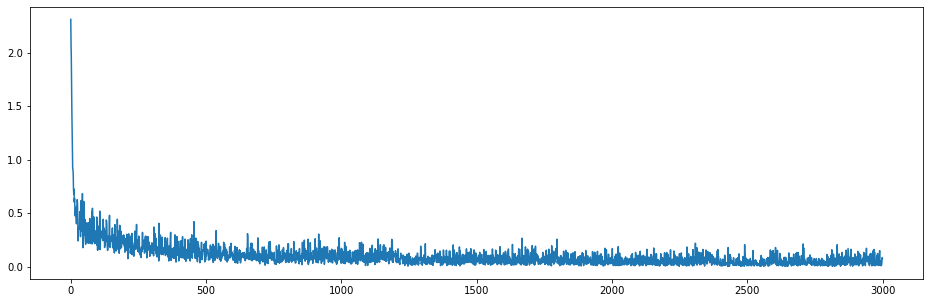

In [114]:
from matplotlib import pyplot
pyplot.figure(figsize=(16, 5))
pyplot.plot(range(len(losses)), losses);

Epoch   1/  5, step 100: training loss =   64.877
Epoch   1/  5, step 200: training loss =   32.303
Epoch   1/  5, step 300: training loss =   28.909
Epoch   1/  5, step 400: training loss =   25.198
Epoch   1/  5, step 500: training loss =   23.647
Epoch   1/  5, step 600: training loss =   21.090
Epoch   2/  5, step 100: training loss =   19.650
Epoch   2/  5, step 200: training loss =   16.705
Epoch   2/  5, step 300: training loss =   17.058
Epoch   2/  5, step 400: training loss =   16.199
Epoch   2/  5, step 500: training loss =   16.979
Epoch   2/  5, step 600: training loss =   17.032
Epoch   3/  5, step 100: training loss =   12.577
Epoch   3/  5, step 200: training loss =   12.652
Epoch   3/  5, step 300: training loss =   14.904
Epoch   3/  5, step 400: training loss =   12.990
Epoch   3/  5, step 500: training loss =   14.189
Epoch   3/  5, step 600: training loss =   13.247
Epoch   4/  5, step 100: training loss =   10.243
Epoch   4/  5, step 200: training loss =   11.213


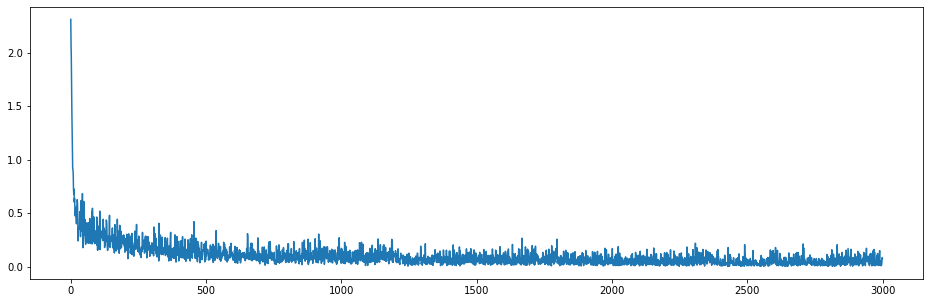

In [117]:
run_model(32)
from matplotlib import pyplot
pyplot.figure(figsize=(16, 5))
pyplot.plot(range(len(losses)), losses);

Epoch   1/ 10, step 100: training loss =   42.563
Epoch   1/ 10, step 200: training loss =   20.374
Epoch   1/ 10, step 300: training loss =   15.662
Epoch   1/ 10, step 400: training loss =   14.660
Epoch   1/ 10, step 500: training loss =   14.221
Epoch   1/ 10, step 600: training loss =   11.161
Epoch   2/ 10, step 100: training loss =    8.140
Epoch   2/ 10, step 200: training loss =    9.038
Epoch   2/ 10, step 300: training loss =    7.818
Epoch   2/ 10, step 400: training loss =    9.629
Epoch   2/ 10, step 500: training loss =    9.708
Epoch   2/ 10, step 600: training loss =    8.553
Epoch   3/ 10, step 100: training loss =    6.523
Epoch   3/ 10, step 200: training loss =    5.956
Epoch   3/ 10, step 300: training loss =    5.531
Epoch   3/ 10, step 400: training loss =    7.369
Epoch   3/ 10, step 500: training loss =    7.982
Epoch   3/ 10, step 600: training loss =    6.178
Epoch   4/ 10, step 100: training loss =    4.091
Epoch   4/ 10, step 200: training loss =    5.018


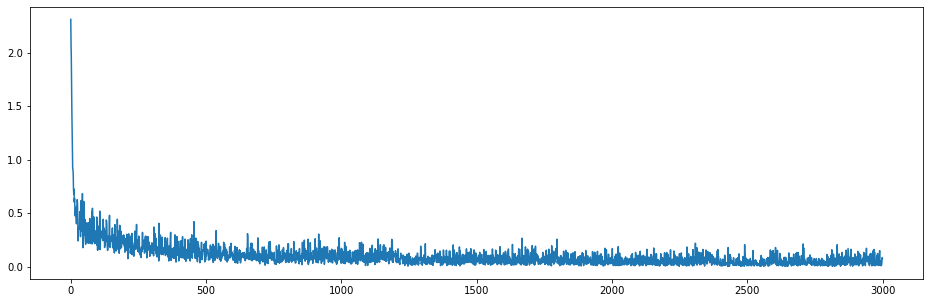

In [120]:
run_model(512, num_epochs=10)
from matplotlib import pyplot
pyplot.figure(figsize=(16, 5))
pyplot.plot(range(len(losses)), losses);

## Modelle

<img src="img/ag/Figure-11-001.png" style="width: 100%;"/>

## Für Neuronale Netze:

Was repräsentiert werden kann hängt ab von

- Anzahl der Layers
- Anzahl der Neutronen per Layer
- Komplexität der Verbindungen zwischen Neutronen

### Was kann man (theoretisch) lernen?

Schwierig aber irrelevant

### Was kann man praktisch lernen?

Sehr viel, wenn man genug Zeit und Daten hat

### Was kann man effizient lernen?

Sehr viel, wenn man sich geschickt anstellt
(und ein Problem hat, an dem viele andere Leute arbeiten)

# Bias/Variance Tradeoff

- Modelle mit geringer Expressivität (representational power)
  - Können schnell trainiert werden
  - Arbeiten mit wenig Trainingsdaten
  - Sind robust gegenüber Fehlern in den Trainingsdaten

- Wir sind nicht an einer möglichst exakten Wiedergabe unserer Daten interessiert

- Entscheidend ist wie gut unser Modell auf unbekannte Daten generalisiert

<img src="img/ag/Figure-09-002.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-004.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-003.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-005.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>


### Generalisierung und Rauschen
<img src="img/ag/Figure-09-008.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-009.png" style="width: 80%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-010.png" style="width: 40%; margin-left: auto; margin-right: auto;"/>

## Komplexität der Entscheidungsgrenze

<img src="img/ag/Figure-09-006.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-09-001.png" style="width: 50%; margin-left: auto; margin-right: auto;"/>

## Datenverteilung und Qualität


### Erinnerung: die Trainings-Schleife

<img src="img/ag/Figure-08-001.png" style="width: 20%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-001.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

## Was lernt ein Klassifizierer?

<img src="img/ag/Figure-08-002.png" style="width: 60%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-003.png" style="width: 100%; margin-left: auto; margin-right: auto;"/>

<img src="img/ag/Figure-08-004.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

# Wie gut sind wir?

Wie wissen wir, wie gut unser Modell wirklich ist?

## Was kann schief gehen?

<img src="img/ag/Figure-03-015.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Was kann schief gehen?

<img src="img/ag/Figure-03-017.png" style="width: 100%; margin-left: auto; margin-right: auto; 0"/>

## Was kann schief gehen?

<img src="img/ag/Figure-03-018.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>

## Accuracy: Wie viel haben wir richtig gemacht?


<img src="img/ag/Figure-03-023.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Precision: Wie gut sind unsere positiven Elemente?


<img src="img/ag/Figure-03-024.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Recall: Wie viele positive Elemente haben wir übersehen?


<img src="img/ag/Figure-03-026.png" style="width: 60%; margin-left: auto; margin-right: auto; 0"/>

## Bessere Netzwerkarchitektur

<img src="img/ag/Figure-21-008.png" style="width: 30%; margin-left: auto; margin-right: auto; 0"/>

<img src="img/ag/Figure-21-009.png" style="width: 40%; margin-left: auto; margin-right: auto; 0"/>

<img src="img/ag/Figure-21-043.png" style="width: 40%; margin-left: auto; margin-right: auto; 0"/>

## Beispiel: Conv Net

In [123]:
def create_conv_model():
    model = nn.Sequential(
        nn.Conv2d(1, 32, 3, 1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 3, 1),
        nn.MaxPool2d(2),
        nn.Dropout2d(0.25),
        nn.Flatten(1),
        nn.Linear(9216, 128),
        nn.ReLU(),
        nn.Dropout2d(0.5),
        nn.Linear(128, 10)
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [127]:
def training_loop(n_epochs, optimizer, model, loss_fn, device, train_loader, val_loader):
    all_losses = []
    for epoch in range(1, n_epochs + 1):
        accumulated_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            output = model(images)
            loss = loss_fn(output, labels)
            with torch.no_grad():
                accumulated_loss += loss
                all_losses.append(loss)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            if (i + 1) % 100 == 0:
                print(f"Epoch {epoch:3}/{n_epochs:3}, step {i + 1}: "
                      f"training loss = {accumulated_loss.item():8.3f}")
                accumulated_loss = 0
    return all_losses

In [128]:
def run_conv_model(num_epochs=num_epochs):
    model, optimizer = create_conv_model()
    losses = training_loop(
        n_epochs=num_epochs,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        device=torch.device('cpu') if torch.cuda.is_available() else torch.device('cpu'),
        train_loader=train_loader,
        val_loader=test_loader
    )

In [130]:
run_conv_model(10)

Epoch   1/ 10, step 100: training loss =   64.182
Epoch   1/ 10, step 200: training loss =   23.208
Epoch   1/ 10, step 300: training loss =   17.487
Epoch   1/ 10, step 400: training loss =   15.157
Epoch   1/ 10, step 500: training loss =   13.652
Epoch   1/ 10, step 600: training loss =   14.628
Epoch   2/ 10, step 100: training loss =   12.649
Epoch   2/ 10, step 200: training loss =   12.711
Epoch   2/ 10, step 300: training loss =   11.821
Epoch   2/ 10, step 400: training loss =   11.490
Epoch   2/ 10, step 500: training loss =   12.337
Epoch   2/ 10, step 600: training loss =   13.438
Epoch   3/ 10, step 100: training loss =   10.000
Epoch   3/ 10, step 200: training loss =   10.065
Epoch   3/ 10, step 300: training loss =   11.949
Epoch   3/ 10, step 400: training loss =   10.181
Epoch   3/ 10, step 500: training loss =   11.667
Epoch   3/ 10, step 600: training loss =   11.638
Epoch   4/ 10, step 100: training loss =    9.827
Epoch   4/ 10, step 200: training loss =   12.221


## Data Engine (Tesla)

<img src="img/data-engine.jpeg" style="width: 100%; margin-left: auto; margin-right: auto;"/>

## Probleme: Abhängigkeiten

Relevante Informationen sind nicht immer nahe in den Daten:

"Er hatte mit dem Mann, der ihm den Schlüssel, der zum Schloss, das ihn von großem Reichtum trennte, gehörte, gab, noch nicht gesprochen.

# Memory / State
<img src="img/ag/Figure-22-012.png" style="width: 20%; margin-left: auto; margin-right: auto;"/>

Funktioniert gut aber mit gewissen Schwächen.

Man muss wissen, welche Information für das aktuell betrachtete Element relevant ist:

- The cat didn't cross the street because *it* was too wide.

<img src="img/garfield.jpg" style="float: right;width: 60%;"/>

<img src="img/garfield-yawn.png" style="float: right;width: 60%;"/>

- The cat didn't cross the street because *it* was too tired.

- The cat didn't cross the street because *it* was too wet.

<img src="img/garfield-rain4.jpg" style="float: right;width: 60%;"/>

- The cat didn't cross the street because *it* was raining.

<img src="img/garfield-rain2.gif" style="float: right;width: 60%;"/>

# The Bitter Lesson (Rich Sutton)

[T]he only thing that matters in the long run is the leveraging of computation.

Corollary: And data. Lots of data.